# Import Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
import warnings
tf.__version__

'2.15.0'

In [ ]:
dataset = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

#### Helper Blocks

In [ ]:
def ignore_warning():
  warnings.filterwarnings('ignore')

# Understanding the Data

## Column Information

Shown below is some information about the dataset. This dataset has 21 features (index 1-21) and 1 output column (Diabetes_012).

The Diabetes_012 column has values 0, 1 or 2. This stands for:
 * No Diabetes or diabetes only when Pregnant
 * Pre-diabetes
 * Diabetes  

Respectively.

In [ ]:
dataset.info()

## Visualising the Data Records

As shown below, the data in this dataset is already encoded from Categorical data to integer values (For example, Male=1 and Female=0, Smoker=1 and Non-Smoker=0, etc.)

In [ ]:
pd.options.display.max_columns = None
dataset.head()

To better visualise what the dataset is describing, the encoded categorical data has been reversed from integers to categorical data in a separate dataframe

In [ ]:
visual_dataset = dataset.copy()

In [ ]:
visual_dataset.Diabetes_012 = visual_dataset.Diabetes_012.replace([0, 1, 2], ['No Diabetes','Pre Diabetes','Diabetes'])
visual_dataset.HighBP = visual_dataset.HighBP.replace([0,1], ['No High BP', 'High BP'])
visual_dataset.HighChol = visual_dataset.HighChol.replace([0,1], ['No High Cholesterol','High Cholesterol'])
visual_dataset.CholCheck = visual_dataset.CholCheck.replace([0,1], ['No Cholesterol Check in 5 Years','Cholesterol Check in 5 Years'])
#visual_dataset.BMI = NA
visual_dataset.Smoker = visual_dataset.Smoker.replace([0,1], ['No', 'Yes'])
visual_dataset.Stroke = visual_dataset.Stroke.replace([0,1], ['No', 'Yes'])
visual_dataset.HeartDiseaseorAttack = visual_dataset.HeartDiseaseorAttack.replace([0,1], ['No', 'Yes'])
visual_dataset.PhysActivity = visual_dataset.PhysActivity.replace([0,1], ['No', 'Yes'])
visual_dataset.Fruits = visual_dataset.Fruits.replace([0,1], ['No', 'Yes'])
visual_dataset.Veggies = visual_dataset.Veggies.replace([0,1], ['No', 'Yes'])
visual_dataset.HvyAlcoholConsump = visual_dataset.HvyAlcoholConsump.replace([0,1], ['No', 'Yes'])
visual_dataset.AnyHealthcare = visual_dataset.AnyHealthcare.replace([0,1], ['No', 'Yes'])
visual_dataset.NoDocbcCost = visual_dataset.NoDocbcCost.replace([0,1], ['No', 'Yes'])
visual_dataset.GenHlth = visual_dataset.GenHlth.replace([1,2,3,4,5], ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])
#visual_dataset.MentHlth = NA
#visual_dataset.PhysHlth = NA
visual_dataset.DiffWalk = visual_dataset.DiffWalk.replace([0,1], ['No', 'Yes'])
visual_dataset.Sex = visual_dataset.Sex.replace([0,1], ['Female', 'Male'])
visual_dataset.Age = visual_dataset.Age.replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    ['18 to 24', '25 to 29', '30 to 34', '35 to 39',
     '40 to 44', '45 to 49', '50 to 54', '55 to 59',
     '60 to 64', '65 to 69', '70 to 74', '75 to 79',
     '80 or Older']
)
visual_dataset.Education = visual_dataset.Education.replace(
    [1, 2, 3, 4, 5, 6],
    ['Never Attended School', 'Elementary', 'Some High School',
     'High School Graduate', 'Some College/Technical School', 'College Graduate']
)
visual_dataset.Income = visual_dataset.Income.replace(
    [1, 2, 3, 4, 5, 6, 7, 8],
    ['Less Than $10,000', 'Less Than $15,000',
     'Less Than $20,000', 'Less Than $25,000',
     'Less Than $35,000', 'Less Than $50,000',
     'Less Than $75,000', '$75,000 or More']
)

In [ ]:
visual_dataset.head()

## Data Analysis

Before creating the Artificial Neural Network, below are a few graphs that analyse the data and explore the correlation between diabetes and the different features of the data.


### Diabetes and Blood Pressure

Even though, the overall number of people without diabetes is high, people with high blood pressure tend to have a higher suceptibility to diabetes. This can be seen as there are about three times as many diabetes patients with high blood pressure than there are with no high blood pressure.

In [ ]:
dbp_fig = px.histogram(visual_dataset,
                   x='HighBP',
                   nbins=47,
                   color='Diabetes_012',
                   title='Distribution of Blood Pressure')
dbp_fig.update_layout(bargap=0.8)

dbp_fig.show()

### Diabetes and Cholesterol

The number of patients with diabetes **and** high cholesterol is almost double the patients with diabetes and **no cholesterol**. As seen by the ribbon above the graph, the distribution of no diabetes and no cholesterol is higher than the distribution of no diabetes and cholesterol. The inverse of the stated can be seen for patients with diabetes, thus proving a relevant correlation between choesterol and diabetes.

In [ ]:
dbp_fig = px.histogram(visual_dataset,
                   x='HighChol',
                   nbins=47,
                   marginal='violin',
                   color='Diabetes_012',
                   title='Distribution of Cholesterol')
dbp_fig.update_layout(bargap=0.8)

dbp_fig.show()

### Diabetes and Smoking

In the case of the correlation between diabetes and smoking, it can immediately be seen that the fact that the patient smokes has little effect on their suceptibility of contracting diabetes.

In [ ]:
dbp_fig = px.histogram(visual_dataset,
                   x='Smoker',
                   nbins=47,
                   marginal='violin',
                   color='Diabetes_012',
                   title='Distribution of Smoking')
dbp_fig.update_layout(bargap=0.8)

dbp_fig.show()

### Diabetes and Physical Activity

The skew of the number of patients that partake in physical activity versus the number of patients that do not, makes the analysis of the correlation challenging.

Despite this, the difference between diabetes and non-diabetes patients in the 'No Physical Activity' category is mush smaller than in the 'Physical Activity' category. This shows that patients that are physcially active have higher chances of not contracting diabetes, and patients that are not physically active, have a higher chance of contracting diabetes.



In [ ]:
dbp_fig = px.histogram(visual_dataset,
                   x='PhysActivity',
                   nbins=47,
                   barmode='group',
                   color='Diabetes_012',
                   title='Distribution of Physical Activity')
dbp_fig.update_layout(bargap=0.8)

dbp_fig.show()

### Diabetes and Alcohol Consumption

As seen with Physical Activity, the same can be deduced from the below graph. Patients that have heavy alcohol consumption levels are more succeptible to contracting the disease than patients that do not have a heavy consumption level.

In [ ]:
dbp_fig = px.histogram(visual_dataset,
                   x='HvyAlcoholConsump',
                   nbins=47,
                   barmode='group',
                   color='Diabetes_012',
                   title='Distribution of Alcohol Consumption')
dbp_fig.update_layout(bargap=0.8)

dbp_fig.show()

### Diabetes and Mental Health

With the graph below, it can be deduced that Mental Health does have a significant impact on a patient's risk of contracting diabetes.

Since the sample space of the patients with 0 days of 'poor' mental health is so large, the chart seems very skewed. However, if focus is kept on how the 'No Diabetes' bar gets closer to the 'Diabetes' bar along the Mental Health axis, it can be said that people that experience fewer days of 'poor' mental health are more likely to avoid diabetes.

In [ ]:
dbp_fig = px.histogram(visual_dataset,
                   x='MentHlth',
                   nbins=47,
                   barmode='group',
                   color='Diabetes_012',
                   title='Distribution of Mental Health')
dbp_fig.update_layout(bargap=0.2)

dbp_fig.show()

### Diabetes and Physical Health

As seen with Mental Health, the same can be said for Physical Health.

In [ ]:
dbp_fig = px.histogram(visual_dataset,
                   x='PhysHlth',
                   nbins=47,
                   barmode='group',
                   color='Diabetes_012',
                   title='Distribution of Physical Health')
dbp_fig.update_layout(bargap=0.2)

dbp_fig.show()

### Diabetes and Age

As seen by the chart below, older patients are more succeptible to contracting diabetes.

Even though the sample space for older patients is larger than younger patients with this data, the variance within each age category decreases as age increases. This shows that the variance between older patients with and without diabetes is less meaning the split is more even. Versus younger patients that have a lower percentage of diabetes patients within the sample space.

In [ ]:
dbp_fig = px.histogram(visual_dataset,
                   x='Age',
                   nbins=47,
                   color='Diabetes_012',
                   title='Distribution of Age').update_xaxes(categoryorder='category ascending')
dbp_fig.update_layout(bargap=0.2)

dbp_fig.show()

# The Neural Network

## Data Preprocessing

### Separating Features

In [ ]:
X_visual = dataset.iloc[:, 1:]
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

### Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Categorize the Dependent Variable

In [ ]:
cat_y_train = tf.keras.utils.to_categorical(y_train)
cat_y_test = tf.keras.utils.to_categorical(y_test)

## Building the ANN

### Initialising the ANN

In [ ]:
ann = tf.keras.models.Sequential()

### Input and 1st Hidden Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=17, activation='relu'))

### Deep Hidden Layers

In [ ]:
ann.add(tf.keras.layers.Dense(units=17, activation='relu')) #2nd Hidden Layer
ann.add(tf.keras.layers.Dense(units=17, activation='relu')) #3rd Hidden Layer
ann.add(tf.keras.layers.Dense(units=17, activation='relu')) #4th Hidden Layer
ann.add(tf.keras.layers.Dense(units=17, activation='relu')) #5th Hidden Layer

### Output Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))

## Training the ANN

### Compile

In [ ]:
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train

In [ ]:
ann.fit(X_train, cat_y_train, batch_size=40, epochs=100)

Epoch 1/100
1265/1265 [==============================] - 6s 3ms/step - loss: 0.4312 - accuracy: 0.8418
Epoch 2/100
1265/1265 [==============================] - 4s 3ms/step - loss: 0.4035 - accuracy: 0.8467
Epoch 3/100
1265/1265 [==============================] - 5s 4ms/step - loss: 0.4006 - accuracy: 0.8481
Epoch 4/100
1265/1265 [==============================] - 6s 5ms/step - loss: 0.3986 - accuracy: 0.8494
Epoch 5/100
1265/1265 [==============================] - 5s 4ms/step - loss: 0.3972 - accuracy: 0.8502
Epoch 6/100
1265/1265 [==============================] - 3s 3ms/step - loss: 0.3961 - accuracy: 0.8498
Epoch 7/100
1265/1265 [==============================] - 3s 2ms/step - loss: 0.3956 - accuracy: 0.8499
Epoch 8/100
1265/1265 [==============================] - 2s 2ms/step - loss: 0.3948 - accuracy: 0.8513
Epoch 9/100
1265/1265 [==============================] - 2s 2ms/step - loss: 0.3943 - accuracy: 0.8509
Epoch 10/100
1265/1265 [==============================] - 2s 2ms/step - l

## Predicting the Results of the Test Set

In [ ]:
cat_y_pred = ann.predict(X_test)
cat_y_pred_bool = np.argmax(cat_y_pred, axis=1)
y_pred = cat_y_pred_bool.astype(float)

527/527 [==============================] - 1s 1ms/step


## Evaluating the ANN

### Confusion Matrix

The confusion matrix below shows that the ANN predicted majority cases as No Diabetes - even when the true value was Pre-Diabetes or Diabetes. This shows the imbalanced nature of the dataset, and that the ANN was overfitted on 'No Diabetes' samples and underfitted on the other two classes.

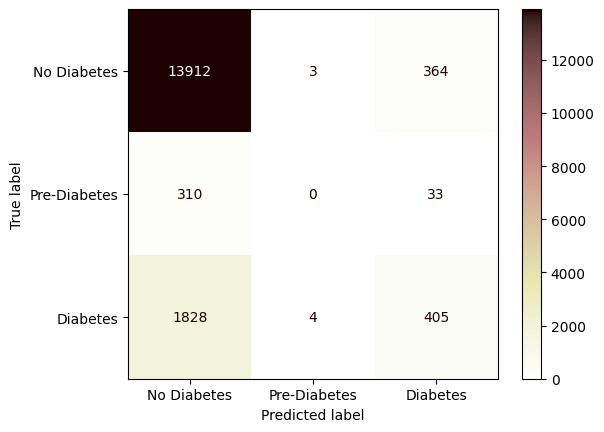

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm, display_labels=['No Diabetes', 'Pre-Diabetes', 'Diabetes'])

cm_display.plot(cmap='pink_r')
plt.show()

### Classification Report

Below is the classification report of the ANN.  
> #### **Precision**: Accuracy of positive predictions.  
  *Precision is the ability of a classifier not to label an instance positive that is actually negative. For each class it is defined as the ratio of true positives to the sum of true and false positives.*  
  The precision values below show that the accuracy of true positives for the 'No Diabetes' class is high, whereas the other two classes are fairly low (or in the case of 'Pre-Diabetes', null).

---

> #### **Recall**: Fraction of positives that were correctly identified.
  *Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives.*
  The recall values below show the same trend observed for precision. Recollection for 'No Diabetes' is high and exceptional, whereas there is very low recollection for the other two classes.

---

> #### **F1-Score**: Weighted harmonic mean of precision and recall.
  *The F1 score is on a range of 0.0 to 1.0; The best score is 1.0 and the worst is 0.0 - The weighted average of F1 should be used to compare classifier models, not global accuracy.*
  The F1 scores below portray the precision and recall for each value. The 'Diabetes' and 'Pre-Diabetes' classes having such low F1 scores is a problem that is explored later in this case study.

In [ ]:
from sklearn.metrics import classification_report

ignore_warning()

print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Pre-Diabetes', 'Diabetes']))

              precision    recall  f1-score   support

 No Diabetes       0.87      0.97      0.92     14279
Pre-Diabetes       0.00      0.00      0.00       343
    Diabetes       0.50      0.18      0.27      2237

    accuracy                           0.85     16859
   macro avg       0.46      0.39      0.39     16859
weighted avg       0.80      0.85      0.81     16859



# Final Remarks

Due to the moderate imbalanced nature of the dataset with regards to Diabetes cases, and the severe imbalanced nature with regards to Pre-Diabetes cases, an 85% accuracy is the best model that can be made through tweaking the parameters. One positive from the above model is that the number of false positives are relatively low, however, the false negatives are significant.

The next course of action with this model would be to explore balancing the dataset and implementing a new ANN model on the balanced dataset.